In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

In [65]:
np.random.seed(42)

n_samples = 120000

data = {
    "age": np.random.randint(18, 80, n_samples),
    "bmi": np.round(np.random.normal(25, 5, n_samples), 2),
    "glucose": np.round(np.random.normal(120, 30, n_samples), 2),
    "blood_pressure": np.round(np.random.normal(80, 10, n_samples), 2),
    "cholesterol": np.round(np.random.normal(200, 40, n_samples), 2),
    "heart_rate": np.random.randint(60, 120, n_samples),
    "activity_level": np.random.randint(1, 6, n_samples),
    "smoking": np.random.randint(0, 2, n_samples),
    "alcohol": np.random.randint(0, 2, n_samples),
}

df = pd.DataFrame(data)

# 🔥 Create IMBALANCED target variable (important for ROC-AUC)
risk_score = (
        0.03 * df["age"] +
        0.08 * df["bmi"] +
        0.06 * df["glucose"] +
        0.04 * df["cholesterol"] +
        0.5 * df["smoking"] +
        0.3 * df["alcohol"] +
        np.random.normal(0, 2, n_samples)
)

df["disease"] = (risk_score > np.percentile(risk_score, 85)).astype(int)

In [66]:
df

,age,bmi,glucose,blood_pressure,cholesterol,heart_rate,activity_level,smoking,alcohol,disease
0,56,20.10,141.74,98.74,218.32,100,5,0,1,0
1,69,27.08,141.79,72.05,229.19,109,3,0,1,0
2,46,24.12,136.18,77.69,176.27,112,5,0,1,0
3,32,29.06,97.09,79.12,260.87,71,5,0,0,1
4,60,21.92,50.27,70.40,178.47,106,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
119995,39,23.27,153.25,84.16,114.47,116,2,0,0,0
119996,28,26.29,136.42,86.02,206.26,119,1,1,0,0
119997,56,27.75,120.17,67.31,131.01,111,2,1,0,0
119998,77,22.34,95.81,65.77,191.56,89,3,1,1,0


In [67]:
x = df.drop('disease', axis=1)
y = df['disease']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
model = LogisticRegression(max_iter=1000)

In [70]:
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [71]:
y_pred = model.predict(x_test)

In [72]:
y_prob = model.predict_proba(x_test)[:, 1]

In [73]:
cm = confusion_matrix(y_test, y_pred)

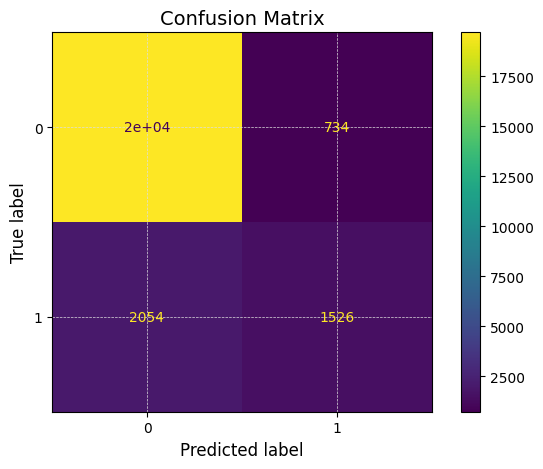

In [74]:
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [75]:
tpr, fpr, threshold = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

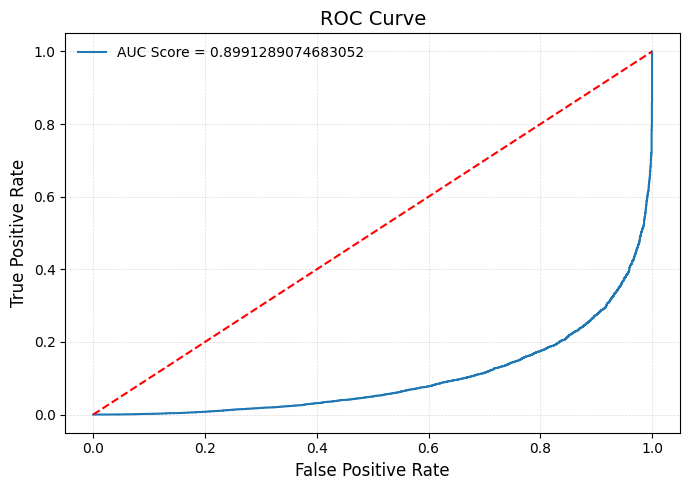

In [76]:
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC Score = {auc}")
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.legend()
plt.show()